In [1]:
# 0) Add Matplotlib inline magic command
%matplotlib inline

# 0) Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# 1) Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# 2) Read the data files and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [4]:
# Checking DataFrames
city_data_df["type"].value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [5]:
# 3) Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [6]:
# 4) Create 3 different DataFrame for each type of city.
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]

In [7]:
# 5) Get the count of rides for city type.
urban_ride_count  = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count  = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count  = rural_cities_df.groupby(["city"]).count()["ride_id"]

# 6) Get the avg fare per city type.
urban_avg_fare  = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare  = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare  = rural_cities_df.groupby(["city"]).mean()["fare"]

# 7) Get the avg number of drivers per city type.
urban_driver_count  = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count  = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count  = rural_cities_df.groupby(["city"]).mean()["driver_count"]

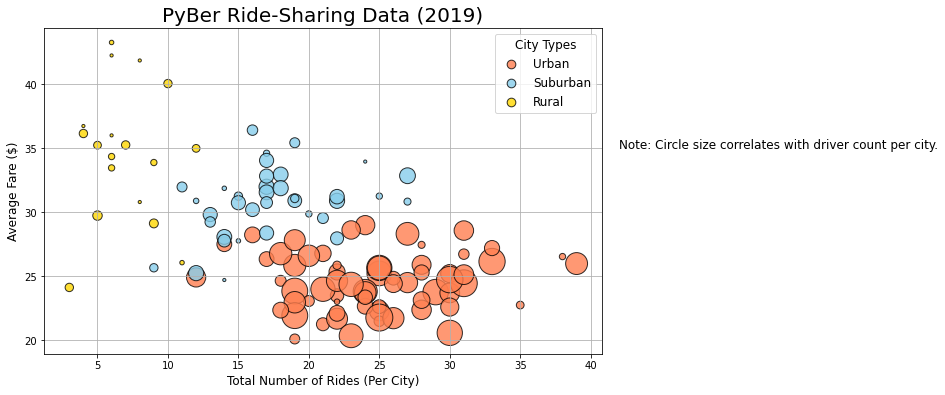

In [8]:
# 8) Create scatter plot with: 
#size * 10
#black edge
# linewidth = 1
# coral color
# 20% transparent
# tittle, legends, labels, grid
# enlarge the figure
# increase font size of labes and title

# ALEXIS: urban_size = [i*10 for i in urban_driver_count]

plt.subplots(figsize=(10, 6))

plt.scatter(urban_ride_count,urban_avg_fare,s=urban_driver_count*10,
            edgecolors='black',linewidth=1,c="coral",alpha=.8,label='Urban')

plt.scatter(suburban_ride_count,suburban_avg_fare,s=suburban_driver_count*10,
            edgecolors='black',linewidth=1,c="skyblue",alpha=.8,label='Suburban')

plt.scatter(rural_ride_count,rural_avg_fare,s=rural_driver_count*10,
            edgecolors='black',linewidth=1,c="gold",alpha=.8,label='Rural')


plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.grid(True)

# 9) Create a legend - plt.legend() parameters
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# 10) Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

plt.show()

In [9]:
# 11) Save the figure.
plt.savefig("analysis/Fig1.png")

<Figure size 432x288 with 0 Axes>

In [20]:
### GET STATISTICS ###
# 1) DESCRIBE
#urban_cities_df.describe()
#suburban_cities_df.describe()
#rural_cities_df.describe()

# 2) DESCRIBE in COUNT SERIES
#urban_ride_count.describe()
#suburban_ride_count.describe()
#rural_ride_count.describe()

# 3) MEAN, MEDIAN per COUNT SERIES
#round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)
#round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)
round(urban_ride_count.mode(),2), round(suburban_ride_count.mode(),2), round(rural_ride_count.mode(),2)


(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [27]:
### GET STATISTICS WITH NUMPY AND SCIPY ###
import scipy.stats as sts

# 1) Calculate the Measures of Central Tendency.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [57]:
# Get the fares per city type.
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [29]:
# 2) Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [38]:
# 3) Get the driver count data per city type.
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']

# 4) Get the STATISTICS with NUMPY and SCIPY
mean_urban_drivers = np.mean(urban_drivers)
mean_suburban_drivers = np.mean(suburban_drivers)
mean_rural_drivers = np.mean(rural_drivers)

median_urban_drivers = np.median(urban_drivers)
median_suburban_drivers = np.median(suburban_drivers)
median_rural_drivers = np.median(rural_drivers)

mode_urban_drivers = sts.mode(urban_drivers)
mode_suburban_drivers = sts.mode(suburban_drivers)
mode_rural_drivers = sts.mode(rural_drivers)

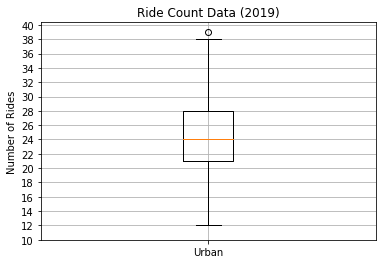

In [40]:
### BOX-AND-WHISKER CHART ###

# 1) Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
ax = plt.axes()
ax.boxplot(urban_ride_count, labels=x_labels)

# 2) Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

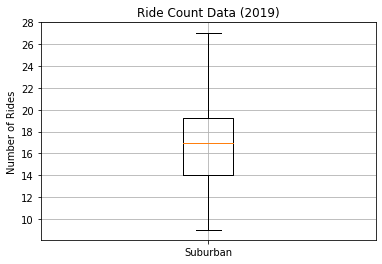

In [42]:
# 1) Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Suburban"]
ax = plt.axes()
ax.boxplot(suburban_ride_count, labels=x_labels)

# 2) Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 30, step=2.0))
ax.grid()
plt.show()

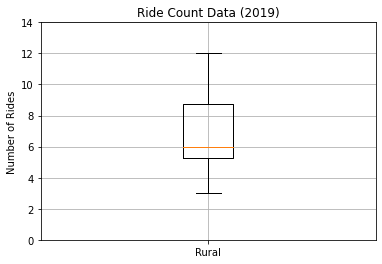

In [44]:
# 1) Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Rural"]
ax = plt.axes()
ax.boxplot(rural_ride_count, labels=x_labels)

# 2) Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 16, step=2.0))
ax.grid()
plt.show()

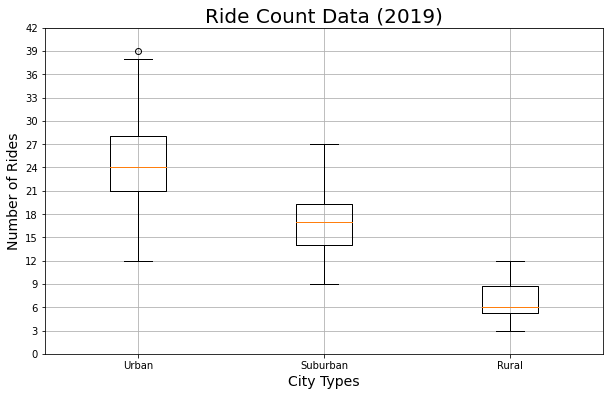

In [45]:
### SEVERAL BOX-AND-WHISKER ###
# Add all ride count box-and-whisker plots to the same graph.

x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)

ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

# Save the figure.
plt.savefig("Analysis/Fig2.png")
plt.show()

In [53]:
# Finding the Outlier

# 1) Filtering UrbanCount
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


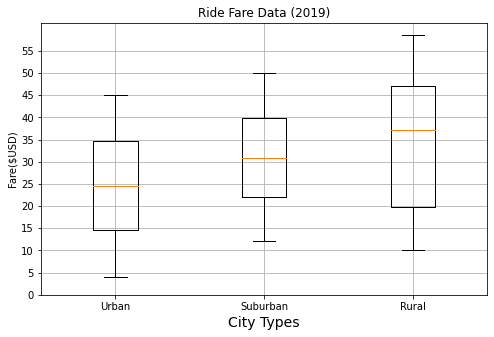

In [62]:
# Create a box-and-whisker plot for the urban fare data.

x_labels = ["Urban", "Suburban","Rural"]
fare_data = [urban_fares, suburban_fares, rural_fares]

fig, ax = plt.subplots(figsize=(8, 5))
ax.boxplot(fare_data, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_xlabel("City Types",fontsize=14)
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()

plt.savefig("Analysis/Fig3.png")
plt.show()

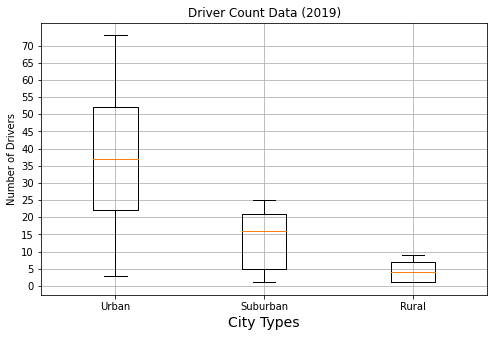

In [65]:
# Create a box-and-whisker plot for the driver count data.

x_labels = ["Urban", "Suburban","Rural"]
driver_data = [urban_drivers, suburban_drivers, rural_drivers]

fig, ax = plt.subplots(figsize=(8, 5))
ax.boxplot(driver_data, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_xlabel("City Types",fontsize=14)
ax.set_yticks(np.arange(0, 75, step=5.0))
ax.grid()

plt.savefig("Analysis/Fig4.png")
plt.show()

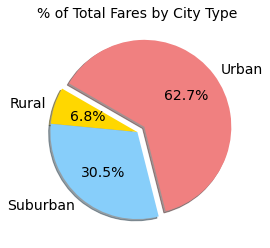

In [93]:
### GETTING PIE CHART WITH PERCENTAGES PER TYPE ###

# 0) Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl

# 1) Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]

# 2) Get the sum of all the fares.
total_fares = pyber_data_df["fare"].sum()

# 3) Calculate the percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type / total_fares

# 4) Create pie chart.
pie_labels = type_percents.index

type_percents.plot(kind="pie", labels=pie_labels, colors=["gold", "lightskyblue", "lightcoral"],
                  explode=[0, 0, 0.1], autopct='%1.1f%%', shadow=True, startangle=150)

plt.title("% of Total Fares by City Type", fontsize=14)
plt.ylabel("")

# 5) Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

# 6) Save Figure
plt.savefig("Analysis/Fig5.png")


plt.show()

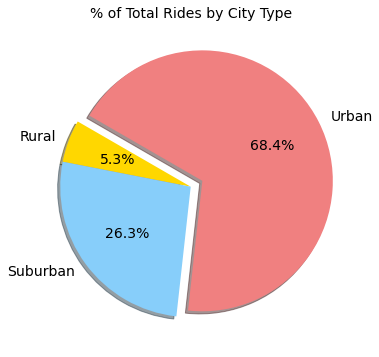

In [94]:
### GETTING PIE CHART WITH PERCENTAGES PER TYPE (COUNT) ###

# 1) Get the sum of the fares for each city type.
count_fares_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]


# 2) Get the count of all the rides.
total_rides = count_fares_by_type.sum()

# 3) Calculate the percentage of fare for each city type.
ride_type_pct = 100 * count_fares_by_type / total_rides

# 4) Create pie chart.
pie_labels_ride = ride_type_pct.index
plt.subplots(figsize=(10, 6))
ride_type_pct.plot(kind="pie", labels=pie_labels_ride, colors=["gold", "lightskyblue", "lightcoral"],
                  explode=[0, 0, 0.1], autopct='%1.1f%%', shadow=True, startangle=150)

plt.title("% of Total Rides by City Type", fontsize=14)
plt.ylabel("")

# 5) Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

# 6) Save Figure
plt.savefig("Analysis/Fig6.png")

plt.show()


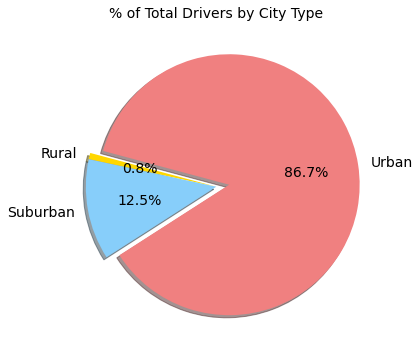

In [97]:
### GETTING PIE CHART WITH PERCENTAGES DRIVERS PER TYPE ###

# 1) Get the sum of the driver for each city type.
sum_drivers_by_type = pyber_data_df.groupby(["type"]).sum()["driver_count"]

# 2) Get the sum of all the fares.
total_drivers = pyber_data_df["driver_count"].sum()

# 3) Calculate the percentage of fare for each city type.
driver_by_type_pct = 100 * sum_drivers_by_type / total_drivers

# 4) Create pie chart.
pie_labels_driver = driver_by_type_pct.index
plt.subplots(figsize=(10,6))
driver_by_type_pct.plot(kind="pie", labels=pie_labels_driver, colors=["gold", "lightskyblue", "lightcoral"],
                  explode=[0, 0, 0.1], autopct='%1.1f%%', shadow=True, startangle=165)

plt.title("% of Total Drivers by City Type", fontsize=14)
plt.ylabel("")

# 5) Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

# 6) Save Figure
plt.savefig("Analysis/Fig7.png")


plt.show()